In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.figure(figsize=(15,18))
import os
import sys

import seaborn as sns
%matplotlib inline
predict_dir_path = '/home/houruijie/traffic/predict_data/'
train_dir_path = '/home/houruijie/traffic/train/'

In [2]:
ls /home/houruijie/traffic/train

call_logs.csv      发货记录.csv   司机量表/             数据介绍.docx*  货量表/
driver_counts.csv  司机电话日志/  城市公路距离记录.csv  货主画像.csv
goods_counts.csv   司机画像.csv   城市天气记录.csv      货量.csv


## 1 训练数据

In [81]:
# 司机画像
driver_portrait = pd.read_csv(train_dir_path + '司机画像.csv')
# 货主画像
shipper_portrait = pd.read_csv(train_dir_path+'货主画像.csv')
# 城市公路距离
city_way_distance = pd.read_csv(train_dir_path + '城市公路距离记录.csv')
# 城市天气记录
city_way_distance = pd.read_csv(train_dir_path + '城市公路距离记录.csv')
# 货量表
goodscounts = pd.read_csv('goods_counts.csv')
# 司机电话日志
driver_call_logs = pd.read_csv(train_dir_path + 'call_logs.csv' )
# 司机量表
driver_counts = pd.read_csv(train_dir_path + 'driver_counts.csv')


### 1.1 司机画像 数据
user_id：司机ID  
gender：性别  
age：年龄  
install_city_short：安装地(市)  
truck_age：车龄  
auth_success_days：认证通过时间  
truck_type：车型  
truck_len：车长  
truck_no_city_id：车牌号所在市编码  
以及一段时长内司机app端行为次数
例：
call_cnt_3：3天内司机打电话数量


In [84]:
driver_portrait.shape

(609222, 29)

In [87]:
driver_portrait.head(5)

,user_id,gender,age,install_city_short,auth_success_days,truck_age,truck_type,truck_len,truck_no_city_id,click_cargo_cnt_3,...,scan_cargo_cnt_14,scan_cargo_cnt_30,call_cargo_cnt_3,call_cargo_cnt_7,call_cargo_cnt_14,call_cargo_cnt_30,call_cnt_3,call_cnt_7,call_cnt_14,call_cnt_30
0,96436390464285200,男,42.0,330600.0,642,8,平板,6.8,330600.0,12,...,595,1659,0,1,3,9,0,1,5,13
1,96436390991015697,男,47.0,370300.0,534,3,平板,4.2,370100.0,15,...,5397,10616,0,8,23,42,0,8,26,48
2,15099575984499189,男,42.0,420800.0,205,3,平板,13.0,421000.0,0,...,2169,7005,0,0,0,8,0,0,0,11
3,96380588065137004,男,39.0,320200.0,366,1,高栏,9.6,130400.0,0,...,1080,2282,1,1,6,35,1,1,10,45
4,96436391885931594,男,47.0,420100.0,261,1,高栏,13.0,411400.0,52,...,3170,5502,5,5,5,6,8,8,8,9


In [179]:
driver_portrait.user_id.unique().shape

(609222,)

### 1.2 货主画像
shipper_id：货主ID  
cargo_msg_cnt_all：发货数量  
deal_cnt_all：已定货量  
pay_cnt_all：已成交货量  
gender：性别  
age：年龄  
auth_success_days：认证通过时间

In [88]:
shipper_portrait = pd.read_csv(train_dir_path+'货主画像.csv')

In [89]:
shipper_portrait.shape

(90310, 7)

In [90]:
shipper_portrait.head(5)

,shipper_id,cargo_msg_cnt_all,deal_cnt_all,pay_cnt_all,gender,age,auth_success_days
0,478,11974,1664,1522,女,48.0,642
1,14863640208623454,286,3,2,男,28.0,478
2,15090713935812634,24,3,1,男,41.0,208
3,15095490963328972,9,1,1,男,32.0,22
4,15096852391828835,889,228,208,女,30.0,208


In [181]:
shipper_portrait.shipper_id.unique().shape

(89943,)

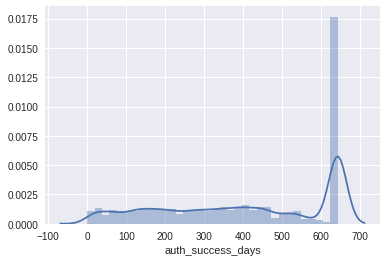

In [202]:
# sns.barplot(shipper_portrait.auth_success_days)
sns.distplot(.auth_success_days)

### 1.3 城市公路距离记录

In [97]:
city_way_distance = pd.read_csv(train_dir_path + '城市公路距离记录.csv')

In [101]:
city_way_distance.tail(10)

,start_city_id,end_city_id,distance
389270,321324,659001,3013.0
389271,321324,659002,3350.0
389272,321324,659003,3538.0
389273,321324,659004,2894.0
389274,321324,710000,1102.0
389275,321324,710100,1102.0
389276,321324,810000,1295.0
389277,321324,810100,1295.0
389278,321324,820000,1337.0
389279,321324,820100,1337.0


### 1.4 城市天气记录
name：城市名字  
code：城市代号  
data：日期  
weather：天气情况  
temperature：温度  
wind：风力

In [105]:
city_weather_history = pd.read_csv(train_dir_path + '城市天气记录.csv', encoding='gbk')

In [111]:
city_weather_history.head(5)

,name,code,date,weather,temperature,wind
0,宝应,321023,2018-01-01,多云/多云,11/3,东风34级/东南风45级
1,宝应,321023,2018-01-02,多云/多云,11/3,东风34级/东南风45级
2,宝应,321023,2018-01-03,阴/小雨,10/3,东风34级/东北风45级
3,宝应,321023,2018-01-04,小雨/中雪,4/0,东北风45级/东北风45级
4,宝应,321023,2018-01-05,大雪/小雪,1/5,东北风45级/东北风45级


In [113]:
print "code's numbers: ",city_weather_history.code.unique().shape[0]
print "city's numbers: ",city_weather_history.name.unique().shape[0]

code's numbers:  66
city's numbers:  66


### 1.5货量表

In [115]:
ls train/货量表/

320100.csv  320400.csv  320700.csv  321000.csv  321300.csv
320200.csv  320500.csv  320800.csv  321100.csv
320300.csv  320600.csv  320900.csv  321200.csv


In [123]:
file_list

['320700.csv',
 '321100.csv',
 '320200.csv',
 '321300.csv',
 '320300.csv',
 '320800.csv',
 '320400.csv',
 '321200.csv',
 '320900.csv',
 '320500.csv',
 '320600.csv',
 '321000.csv',
 '320100.csv']

In [158]:
def concat_goods_counts():
    #将读取的第一个CSV文件写入合并后的文件保存
    file_list = os.listdir(train_dir_path + '货量表/')
    df = pd.read_csv(train_dir_path+ '货量表/' + file_list[0]) 
    df.to_csv(train_dir_path + 'goods_counts.csv',index=False)
    for i in range(1,len(file_list)):
        df = pd.read_csv(train_dir_path + '货量表/' + file_list[i])
        df.to_csv(train_dir_path + 'goods_counts.csv',index=False, header=False, mode='a+')

In [183]:
concat_goods_counts()
goodscounts = pd.read_csv('goods_counts.csv')

In [184]:
goodscounts.head(5)

,city,day,count
0,320700,20180101,196
1,320700,20180102,411
2,320700,20180103,470
3,320700,20180104,345
4,320700,20180105,404


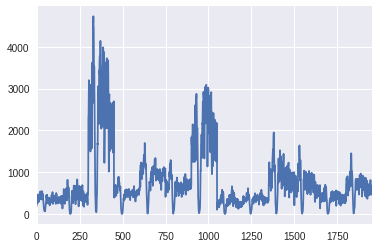

In [195]:
goodscounts['count'].plot()

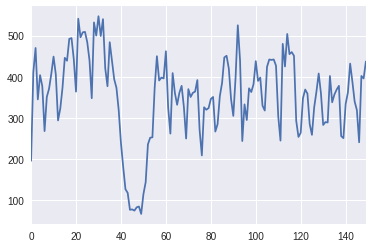

In [203]:
goodscounts[goodscounts.city==320700]['count'].plot()

In [2]:
for city_code in goodscounts.city.unique():
    goodscounts[goodscounts.city==city_code]['count'].plot()

NameError: name 'goodscounts' is not defined

### 1.1 司机电话日志

In [145]:
ls /home/houruijie/traffic/train

发货记录.csv   司机画像.csv  城市公路距离记录.csv  数据介绍.docx*  货量.csv
司机电话日志/  司机量表/     城市天气记录.csv      货主画像.csv    货量表/


In [155]:
def concat_call_logs():
    #将读取的第一个CSV文件写入合并后的文件保存
    file_list = os.listdir(train_dir_path + '司机电话日志/')
    df = pd.read_csv(train_dir_path+ '司机电话日志/' + file_list[0]) 
    df.to_csv(train_dir_path + 'call_logs.csv',index=False)
    for i in range(1,len(file_list)):
        df = pd.read_csv(train_dir_path + '司机电话日志/' + file_list[i])
        df.to_csv(train_dir_path + 'call_logs.csv',index=False, header=False, mode='a+')

In [159]:
concat_call_logs()
driver_call_logs = pd.read_csv(train_dir_path + 'call_logs.csv' )

In [166]:
driver_call_logs.day.sort_values().unique()

array([20180101, 20180102, 20180103, 20180104, 20180105, 20180106,
       20180107, 20180108, 20180109, 20180110, 20180111, 20180112,
       20180113, 20180114, 20180115, 20180116, 20180117, 20180118,
       20180119, 20180120, 20180121, 20180122, 20180123, 20180124,
       20180125, 20180126, 20180127, 20180128, 20180129, 20180130,
       20180131, 20180201, 20180202, 20180203, 20180204, 20180205,
       20180206, 20180207, 20180208, 20180209, 20180210, 20180211,
       20180212, 20180213, 20180214, 20180215, 20180216, 20180217,
       20180218, 20180219, 20180220, 20180221, 20180222, 20180223,
       20180224, 20180225, 20180226, 20180227, 20180228, 20180301,
       20180302, 20180303, 20180304, 20180305, 20180306, 20180307,
       20180308, 20180309, 20180310, 20180311, 20180312, 20180313,
       20180314, 20180315, 20180316, 20180317, 20180318, 20180319,
       20180320, 20180321, 20180322, 20180323, 20180324, 20180325,
       20180326, 20180327, 20180328, 20180329, 20180330, 20180

In [167]:
driver_call_logs.head(5)

,city,day,user_id,id
0,320700,20180316,23429835901096698,376169218
1,320700,20180228,96436391333622425,367207192
2,320700,20180228,96315273736851793,367207192
3,320700,20180228,600608457530817539,366767097
4,320700,20180228,96436390483266858,367143564


In [170]:
driver_call_logs.user_id.value_counts().shape

(444808,)

### 1.3 司机量表

In [173]:
def concat_driver_counts():
    #将读取的第一个CSV文件写入合并后的文件保存
    file_list = os.listdir(train_dir_path + '司机量表/')
    df = pd.read_csv(train_dir_path+ '司机量表/' + file_list[0]) 
    df.to_csv(train_dir_path + 'driver_counts.csv',index=False)
    for i in range(1,len(file_list)):
        df = pd.read_csv(train_dir_path + '司机量表/' + file_list[i])
        df.to_csv(train_dir_path + 'driver_counts.csv',index=False, header=False, mode='a+')
concat_driver_counts()

In [177]:
driver_counts = pd.read_csv(train_dir_path + 'driver_counts.csv')
driver_counts.shape

(1899, 3)

In [178]:
driver_counts.head(5)

,city,day,driver_call_count
0,320700,20180101,438
1,320700,20180102,1120
2,320700,20180103,1100
3,320700,20180104,564
4,320700,20180105,669


## 预测数据

In [68]:
predict = pd.read_csv(predict_dir_path + 'predict.csv', header=None)
weather = pd.read_csv(predict_dir_path + '天气数据.csv', encoding='gbk')
predict_sample = pd.read_csv(predict_dir_path + 'predict_sample.csv', header=None)

,0,1
0,96380588048193900,398829615
1,96436390618420100,399055125
2,96436391955588500,399018641
3,96052842979150500,399245056
4,96436391432418500,399215994
5,96436390683149300,398941636
6,96042790853897100,398806249
7,23429835901030500,398934006
8,96117370309881700,398739517
9,96380588049660100,398660048


In [73]:
predict_sample.head(100)

,0,1,2
0,96380588048193900,398829615,0
1,96436390618420100,399055125,0
2,96436391955588500,399018641,0
3,96052842979150500,399245056,0
4,96436391432418500,399215994,0
5,96436390683149300,398941636,0
6,96042790853897100,398806249,0
7,23429835901030500,398934006,0
8,96117370309881700,398739517,0
9,96380588049660100,398660048,0


In [74]:
predict

,0,1
0,96380588048193900,398829615
1,96436390618420100,399055125
2,96436391955588500,399018641
3,96052842979150500,399245056
4,96436391432418500,399215994
5,96436390683149300,398941636
6,96042790853897100,398806249
7,23429835901030500,398934006
8,96117370309881700,398739517
9,96380588049660100,398660048


In [53]:
weather.shape

(462, 6)

In [66]:
ls

data/      predict_data/  Untitled.ipynb  预测数据.zip
__MACOSX/  train/         训练数据.zip


In [58]:
weather.date.unique()

array([u'2018/6/1', u'2018/6/2', u'2018/6/3', u'2018/6/4', u'2018/6/5',
       u'2018/6/6', u'2018/6/7'], dtype=object)

In [62]:
weather.weather.unique().shape

(20,)

In [65]:
weather.wind.unique().shape

(23,)